Projet prédiction de ventes: 
Prédire les prix de vente des appartements et la pratique présentant l'ingénierie, l'analyse exploratoire et la modélisation.

Méthode:
1) Exploration complète des données:
- comprendre comment les variables sont distribuées et comment elles intéragissent.
- Appliquer différentes transformations avant de passer aux ML.

2) Prix des maisons EDA:
- Techniques de visualisations pour etudier la données et comprendre la donnée manquante.
- Comprendre les heatmaps, les paiplots et t-sne pour éclairer les entrées appropriées au modèle linéaire

3) Machine Learning
- Régression Linéaire multiple 
- Méthode de régularisation Regression Ridge, Lasso
- Elastic Net 
- Régresseur Random Forest
- Modèle plus avancée: XGBOOST et réseaux neuronaux.

## Etape 1: Exploration des données

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 

In [3]:
# importation des données de train et de test

train = pd.read_csv(r"C:\Users\Karim\OneDrive\Desktop\Etudes\Master Science Aflokkat\Machine Learning\cours 4\train.csv")
test = pd.read_csv(r"C:\Users\Karim\OneDrive\Desktop\Etudes\Master Science Aflokkat\Machine Learning\cours 4\test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Renommer Certaines colonnes 
train.rename(columns={"MSSubClass":"Type_habitation", "MSZoning":"classification_zone","LotFrontage":"Longueur_facade","LotArea":"Superficie_terrain","Street":'Type_acces_route',"Alley":"Type_acces_allée_arrière",
                      "LotShape":"Forme_terrain","LandContour":"Relief_terrain","Utilities":"Type_service_disponible","PoolArea":"Piscine_air","PoolQC":"Piscine_qc","Fence":"cloture",
                      "MiscFeature":"Fonctionnalite_diverse","YrSold":"anne_vente","SaleType":"Type_vente","SaleCondition":"Condition_vente","SalePrice":"Prix_vente"}, inplace=True)
train.head()

,Id,Type_habitation,classification_zone,Longueur_facade,Superficie_terrain,Type_acces_route,Type_acces_allée_arrière,Forme_terrain,Relief_terrain,Type_service_disponible,...,Piscine_air,Piscine_qc,cloture,Fonctionnalite_diverse,MiscVal,MoSold,anne_vente,Type_vente,Condition_vente,Prix_vente
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Afficher que les colonnes avec valeurs manquantes
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values

Longueur_facade              259
Type_acces_allée_arrière    1369
MasVnrType                   872
MasVnrArea                     8
BsmtQual                      37
BsmtCond                      37
BsmtExposure                  38
BsmtFinType1                  37
BsmtFinType2                  38
Electrical                     1
FireplaceQu                  690
GarageType                    81
GarageYrBlt                   81
GarageFinish                  81
GarageQual                    81
GarageCond                    81
Piscine_qc                  1453
cloture                     1179
Fonctionnalite_diverse      1406
dtype: int64

In [6]:
# Supprimer la colonne ID 
train.drop("Id", axis=1, inplace=True)
train 

,Type_habitation,classification_zone,Longueur_facade,Superficie_terrain,Type_acces_route,Type_acces_allée_arrière,Forme_terrain,Relief_terrain,Type_service_disponible,LotConfig,...,Piscine_air,Piscine_qc,cloture,Fonctionnalite_diverse,MiscVal,MoSold,anne_vente,Type_vente,Condition_vente,Prix_vente
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


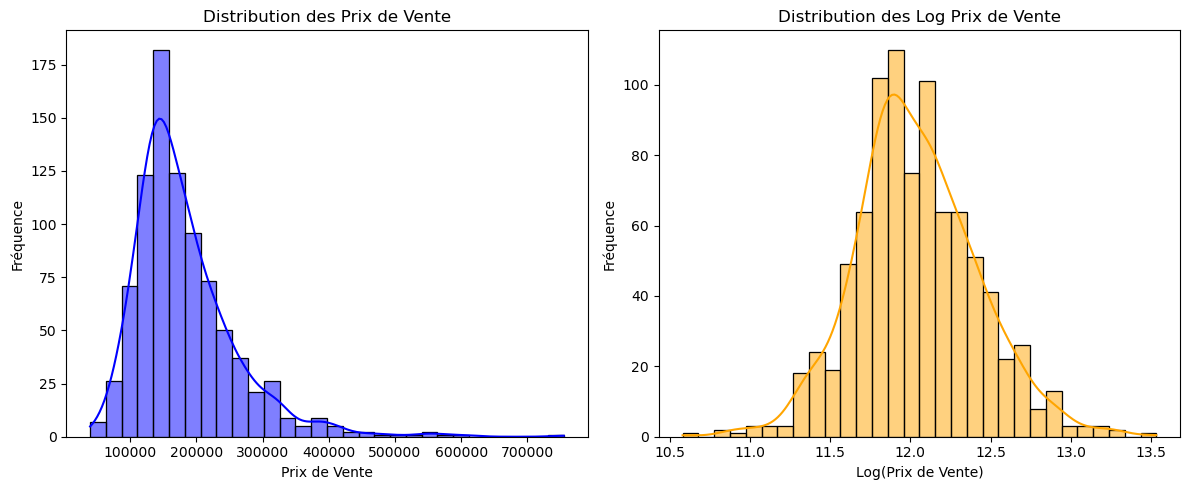

In [47]:
# Analyse de la distribution des prix de vente 

# Analyse de la distribution des prix de vente 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogramme du prix de vente brut
sns.histplot(train['Prix_vente'], kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Distribution des Prix de Vente')
axes[0].set_xlabel('Prix de Vente')
axes[0].set_ylabel('Fréquence')

# Transformation logarithmique du prix de vente
train['Log_Prix_vente'] = np.log1p(train['Prix_vente'])
sns.histplot(train['Log_Prix_vente'], kde=True, color='orange', bins=30, ax=axes[1])
axes[1].set_title('Distribution des Log Prix de Vente')
axes[1].set_xlabel('Log(Prix de Vente)')
axes[1].set_ylabel('Fréquence')

# Ajuster les espacements
plt.tight_layout()
plt.show()


Interpetation: La distribution est ici asymétrique à droite.
La majorité des maisons se vendent à des prix qui oscillent entre 100 000$ et 200 000$ mais il y'a quelques valeurs extrêmes (outliers) qui tirent la distribution vers la droite. 
La transformation logarithmique permet de réajuster les prix de vente

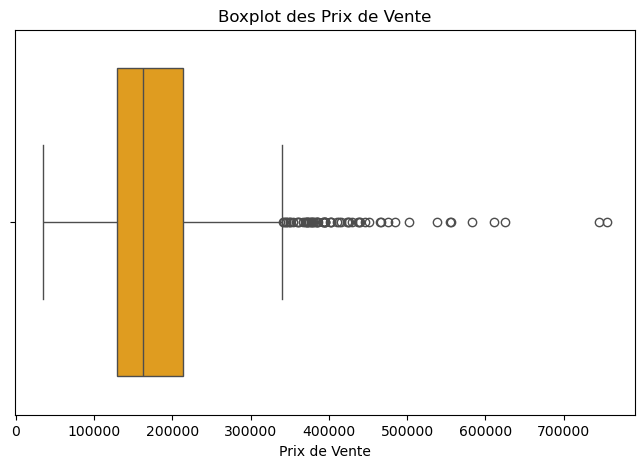

In [9]:
# Vérification des outliers avec un boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Prix_vente'], color='orange')
plt.title('Boxplot des Prix de Vente')
plt.xlabel('Prix de Vente')     
plt.show()


Le boxplot montre:
- Une médiane du prix de ventes autour des 180 000$
- un IQR plutot compacte
- une série d'ouliers à droite au délà des 350 000$ avec quelques ventes extrêmes dans les 700 000$

Stratégie:
- Garder l'ensemble des données pour un premier test de modélisation
- si modèle sous performe avec RMSE mauvais, on réévalue par la suite.

Text(0.5, 1.0, 'Matrice de Corrélation des Variables Numériques')

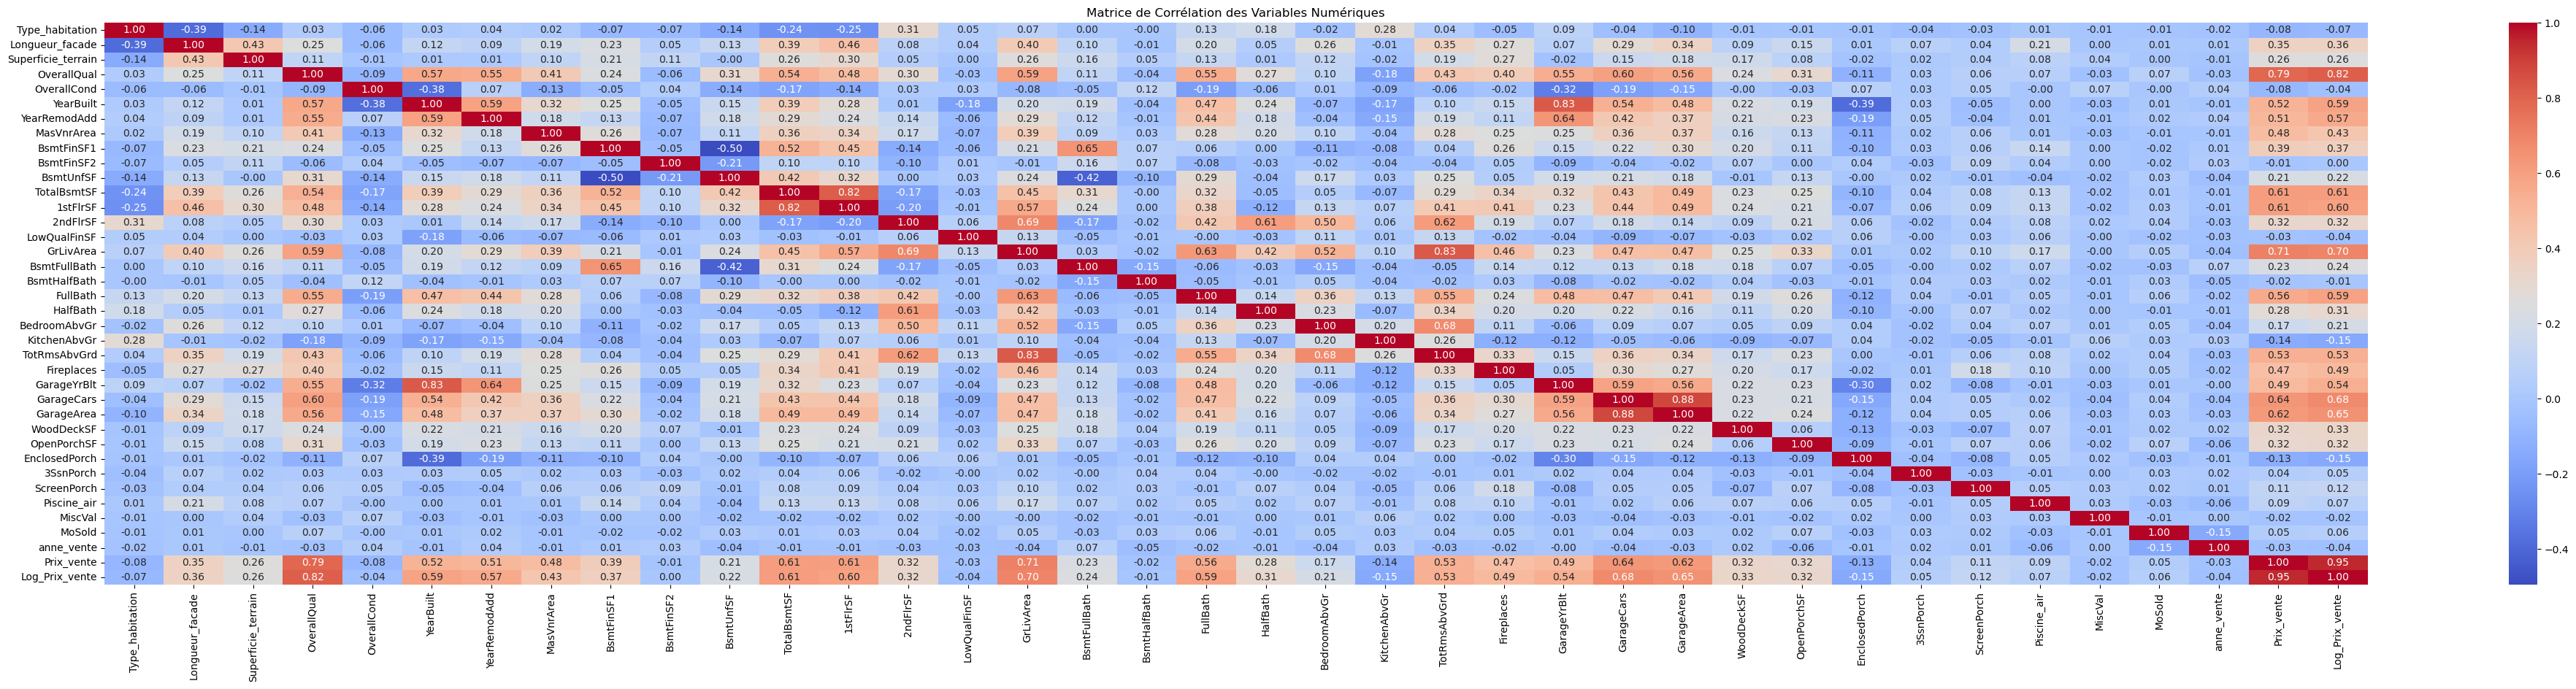

In [10]:
# matrice de corrélation sur les variables numériques
num_cols = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_cols.corr()
plt.figure(figsize=(50,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')   

Lorsqu'on se réfère au prix de vente:
- les carrés foncés signifient une corrélation positive: quand la variable augmente, le prix de vente augmente aussi
- les carrés foncés bleus signifient une corrélation négative: quand la variable augmente, le prix de vente diminue.
- Les carrés clairs indiquent une corrélation faible ou nulle.

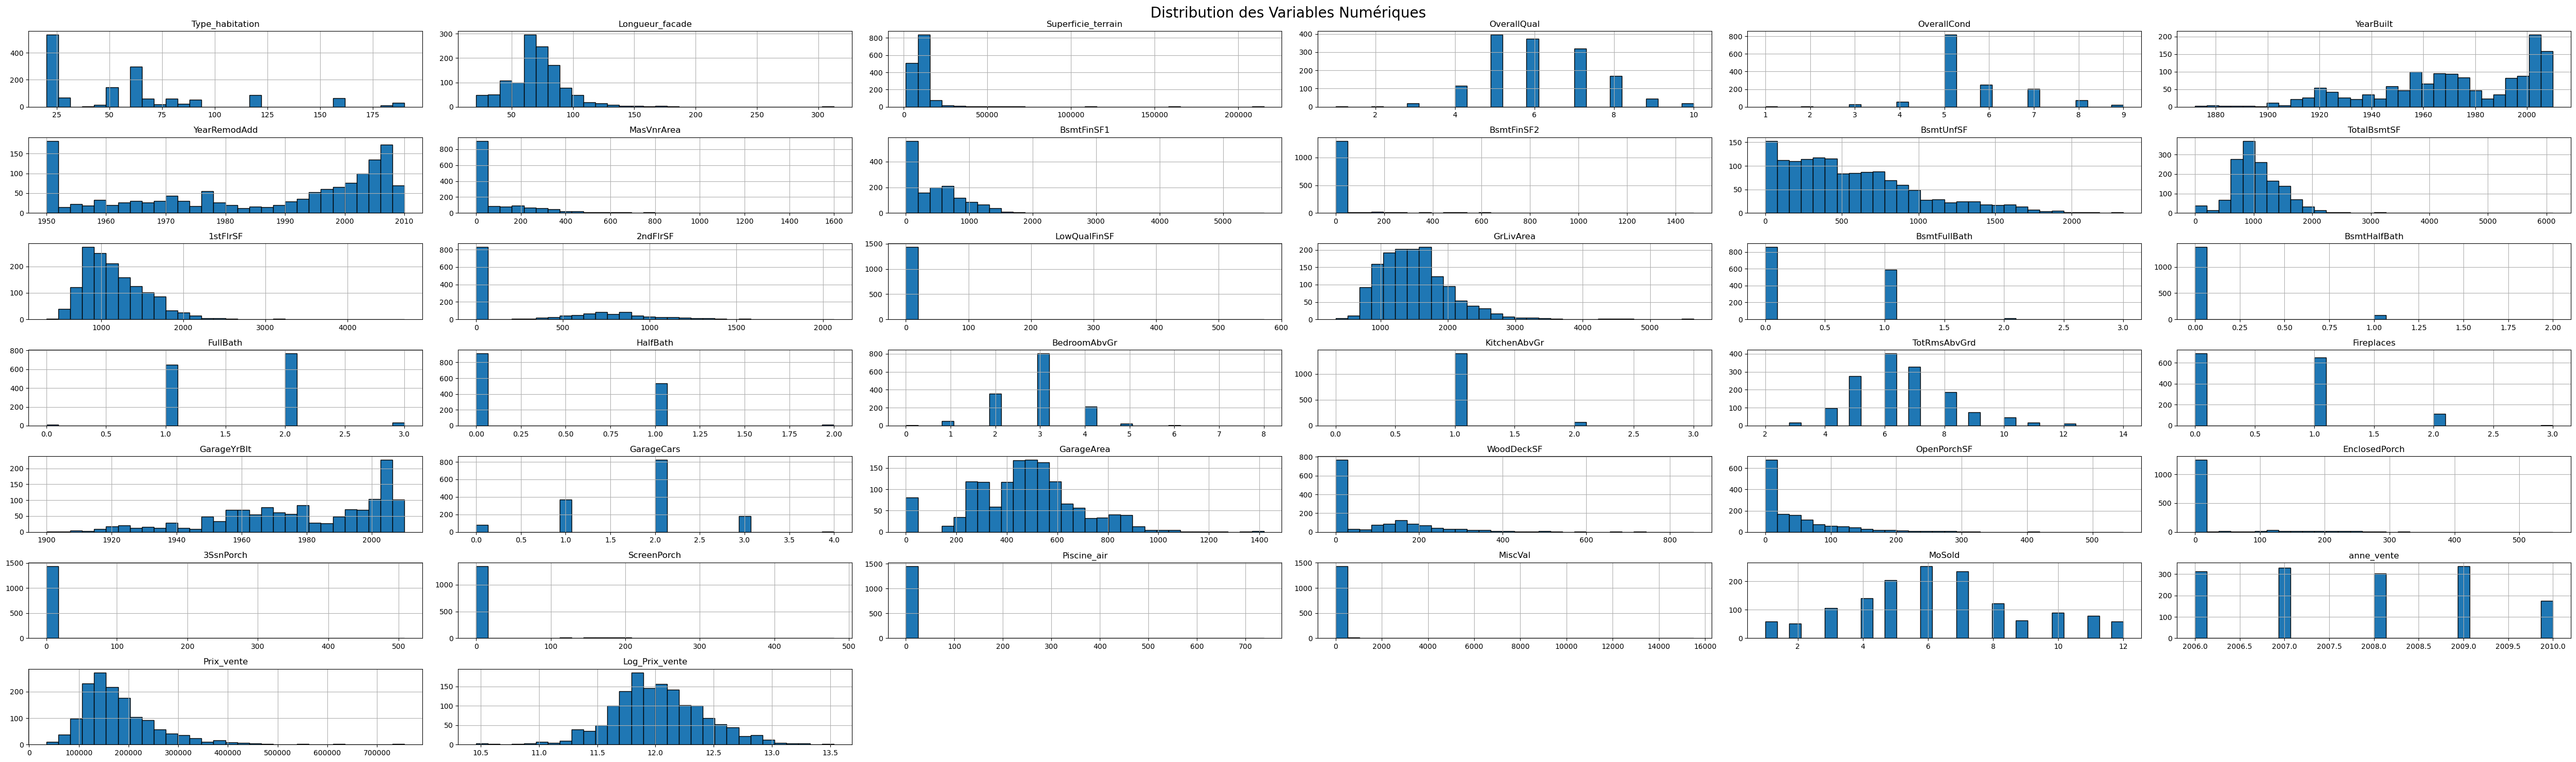

In [11]:
# Distribution de l'ensemble des variables qualitiatives
train.hist(figsize=(50,15), bins=30, edgecolor='black')
plt.suptitle('Distribution des Variables Numériques', fontsize=20)
plt.tight_layout()
plt.show()

## Etape 2 Preparation du jeu de données:
60% d'entrainements, 20% d'évaluation et 20% de test

In [12]:
# A savoir 
# Le jeu d'entraînement permet d'apprendre a partir d'exemple                  
# Le jeu de validation permet de tester l'apprentissage pendant la préparation 
# Le jeu de test permet de tester l'apprentissage final                        

# Diviser le dataset en 3 parties: training, validation et test
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Étape 1 — 60% train, 40% temp
train, reste = train_test_split(train, test_size=0.4, random_state=1)

# Étape 2 — 50% validation, 50% test du reste (donc 20% + 20% du total)
validation, test = train_test_split(reste, test_size=0.5, random_state=1)
print("Taille du jeu d'entraînement :", train.shape) 
print("Taille du jeu de validation :", validation.shape) 
print("Taille du jeu de test :", test.shape)

Taille du jeu d'entraînement : (876, 81)
Taille du jeu de validation : (292, 81)
Taille du jeu de test : (292, 81)


Séparer le jeu de données en X et Y.
- X les variables explicatives et quantitatives 
- Y la variable à expliquer

In [13]:
# separer le jeu de données en X et Y.
# X les variables explicatives et quantitatives
# Y la variable à expliquer
x_train = train.drop(['Prix_vente', 'Log_Prix_vente'], axis=1)
y_train = train['Log_Prix_vente']
x_validation = validation.drop(['Prix_vente', 'Log_Prix_vente'], axis=1)
y_validation = validation['Log_Prix_vente']
x_test = test.drop(['Prix_vente', 'Log_Prix_vente'], axis=1)
y_test = test['Log_Prix_vente']

In [14]:
# Identifier les colonnes catégorielles 
categorical_cols_train = x_train.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols_train

categorical_cols_validation = x_validation.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols_validation

categorical_cols_test = x_test.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols_test

['classification_zone',
 'Type_acces_route',
 'Type_acces_allée_arrière',
 'Forme_terrain',
 'Relief_terrain',
 'Type_service_disponible',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Piscine_qc',
 'cloture',
 'Fonctionnalite_diverse',
 'Type_vente',
 'Condition_vente']

In [15]:
# Transformer les variables catégorielles en variables dummies
x_train = pd.get_dummies(x_train, columns=categorical_cols_train, drop_first=True) # drop_first=True pour éviter la multicolinéarité
x_validation = pd.get_dummies(x_validation, columns=categorical_cols_validation, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols_test, drop_first=True)

In [16]:
# Gérer les valeurs manquantes en utilisant l'imputation par la médiane
# Pour les colonnes numériques : moyenne ou médiane
x_train = x_train.fillna(x_train.median())
x_validation = x_validation.fillna(x_validation.median())
x_test = x_test.fillna(x_test.median())

# Pour les colonnes catégorielles : valeur la plus fréquente
x_train = x_train.fillna(x_train.mode().iloc[0])
x_validation = x_validation.fillna(x_validation.mode().iloc[0])
x_test = x_test.fillna(x_test.mode().iloc[0])

In [17]:
# Aligner les colonnes entre train et test
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

### Régression Linéaire multiple

In [18]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

y_pred = linear_regression.predict(x_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Résultats du modèle de Régression Linéaire :")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

Résultats du modèle de Régression Linéaire :
MAE  : 0.20
RMSE : 0.24
R²   : 0.668


Intepretation coefficients: 
- MAE: Erreur absolue moyenne de 0.20. bon signe
- RMSE: Erreur quadratique moyenne légèrement sensible aux outliers. Pas de grosses différences avec le MAE donc il y'a pas trop d'outliers mal prédit.
- R2: 67% --> le modèle explique le prix de vente à 67%

### Régression Ridge

In [20]:
# régression ridge et lasso
from sklearn.linear_model import Ridge, Lasso

# régression ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2 = r2_score(y_test, y_pred_ridge)

print("Résultats du modèle de Régression Linéaire :")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

Résultats du modèle de Régression Linéaire :
MAE  : 0.10
RMSE : 0.14
R²   : 0.891


On a ici de meilleurs résultats avec un modèle qui explique le prix de vente à 89%.

### Regression Lasso

In [22]:
# Regression Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)


mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2 = r2_score(y_test, y_pred_lasso)
print("Résultats du modèle de Régression Linéaire :")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

Résultats du modèle de Régression Linéaire :
MAE: 0.12
RMSE: 0.17
R²: 0.834


### Elastic Net

In [23]:
# Faire une regression elastic net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
y_pred_enet = elastic_net.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_enet)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_enet))
r2 = r2_score(y_test, y_pred_enet)
print("Résultats du modèle de Régression Linéaire :")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

Résultats du modèle de Régression Linéaire :
MAE: 0.11
RMSE: 0.16
R²: 0.853


### Regression avec XG BOOST

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
from xgboost import XGBRegressor


# Modèle XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,      # nombre d'arbres
    learning_rate=0.05,    # taux d'apprentissage
    max_depth=5,           # profondeur max des arbres
    subsample=0.8,         # fraction d'échantillons utilisée par arbre
    colsample_bytree=0.8,  # fraction de colonnes utilisée
    random_state=42)

# Entraînement
xgb_model.fit(x_train, y_train)

# Prédiction
y_pred = xgb_model.predict(x_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Résultats du modèle XGBoost:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


Résultats du modèle XGBoost:
MAE  : 0.09
RMSE : 0.13
R²   : 0.904


En général le XG Boost:
- donne un R2 plus élevée que les régressions vue précédemment 
- Nécessite moins de pré processing (il gère mieux les échelles et les valeurs manquantes)
- Un peu plus lent à entrainer en fonction de la taille du modèle

### Régression Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# regression random forest

regr = RandomForestRegressor(max_depth=20, random_state=0)  #La profondeur maximale (max_depth) contrôle la complexité de chaque arbre (plus de détails)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2_train = r2_score(y_train, regr.predict(x_train))
r2 = r2_score(y_test, y_pred)

print("Résultats du modèle random forest:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² sur train : {r2_train:.3f}")
print(f"R² sur test  : {r2_test:.3f}")


Résultats du modèle random forest:
MAE  : 0.10
RMSE : 0.15
R² sur train : 0.981
R² sur test  : 0.867


Intepretation: En augmentant la profondeur de chaque arbre, on risque d'avoir des données qui s'ajustent parfaitement aux jeux d'entrainements.
- Si R2 train a peu pres égal R2 test: le modèle généralise bien.
- Si R2 train trop élevé par rapport au R2 test: surraprentissage (on apprends trop sur le jeu d'entraînement)

Dans notre cas la différence est petite, rien d'alarmant.
Le modèle est très bon.

### Régression de reseaux neuronaux

In [27]:
# télécharger librairie tensorflow et keras
import tensorflow as tf
from tensorflow import keras

In [28]:
# Regression de reseaux neuronaux
model = keras.Sequential([
    keras.layers.Dense(3, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(3, activation='relu'),

    keras.layers.Dense(1)  #couche de sortie pour la régression
    ])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)
# Prédiction
y_pred_nn = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2 = r2_score(y_test, y_pred_nn)
print("Résultats du modèle de Réseaux Neuronaux:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

c:\Users\Karim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3933.9414
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 130.1733
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.8347
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.4677
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.6499
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.5793
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.6258
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.6265
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56.3469
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.6290
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.6822
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.2354
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.6573
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.2891
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -